# Sparse Bayesian Linear Regression with Horseshoe Prior

Bayesian linear regression is a probabilistic approach to linear regression, where we assume that the target variable is normally distributed around a linear combination of the input variables.

$$
\begin{aligned}
    y^{(d)} | x^{(d)}, w, \sigma_n^2 \sim \mathcal{N}(y | w^\top x^{(d)}, \sigma_n^2)
\end{aligned}
$$

## The Horseshoe Prior

[Malakic & Schmidt (2016)] proposed a **sparse Bayesian linear regression model**, where the weights are assumed to be distributed according to a horseshoe distribution [Carvalho+ (2010)], which is given by

$$
\begin{aligned}
    w_i | \lambda_i, \tau, \sigma_n^2 &\sim \mathcal{N}(w_i | 0, \lambda_i^2 \tau^2 \sigma_n^2) && i = 1, \dots, N, \\
    \lambda_i &\sim \mathcal{C}^+(\lambda_i | 0, 1), \\
    \tau &\sim \mathcal{C}^+(\tau | 0, 1) && i = 1, \dots, N, \\
    \sigma_n^2 &\sim \frac{1}{\sigma_n^2} d\sigma_n^2,
\end{aligned}
$$

with parameters

- $w_i$ being the weights,
- $\lambda_i$ being the local shrinkage parameters associated with each $w_i$,
- $\tau$ being the global shrinkage parameter, and
- $\sigma_n^2$ being the noise variance.

$\mathcal{C}^+(\cdot | 0, 1)$ denotes the half-Cauchy distribution with location $0$ and scale $1$:

$$
\begin{aligned}
    \mathcal C^+(z | 0, 1) = \frac{2}{\pi} \frac{1}{1 + z^2}, \quad z \gt 0.
\end{aligned}
$$

$\sigma_n^2 \sim \sigma_n^{-2} d\sigma_n^2$ means that $\sigma_n^2$ is distributed according to an improper distribution (here, 'improper' means that the distribution does not satisfy $\int p(\sigma_n^2) d\sigma_n^2 = 1$):

$$
\begin{aligned}
    p(\sigma_n^2) \propto \frac{1}{\sigma_n^2},
\end{aligned}
$$

which can be interpreted as an inverse-gamma distribution with shape parameter $\alpha \to 0$ and scale parameter $\beta \to 0$:

$$
\begin{aligned}
    \lim_{\alpha_n, \beta_n \to 0}
    \Gamma^{-1} (\sigma_n^2 | \alpha_n, \beta_n)
    =
    \lim_{\alpha_n, \beta_n \to 0}
    \frac{\beta_n^{\alpha_n}}{\Gamma(\alpha_n)}
    \left( \frac{1}{\sigma_n^2} \right)^{\alpha_n + 1}
    \exp \left( -\frac{\beta_n}{\sigma_n^2} \right).
\end{aligned}
$$

The horseshoe distribution is a heavy-tailed distribution, which allows for a large number of weights to be close to zero, while still allowing for a few weights to be large.

## Reformulation of the Horseshoe Prior

According to [Wand+ (2011)], a half-Cauchy distribution $\mathcal{C}^+(x | 0, a)$ can be reformulated as a scale mixture of inverse-gammas:

$$
\begin{aligned}
    x^2 | a' &\sim \Gamma^{-1} \left( x^2 \middle| \frac{1}{2}, \frac{1}{a'} \right), \\
    a | a &\sim \Gamma^{-1} \left( a' \middle| \frac{1}{2}, \frac{1}{a^2} \right),
\end{aligned}
$$

and thus the horseshoe distribution can be reformulated as [Makalic & Schmidt (2016)]

$$
\begin{aligned}
    w_i | \lambda_i, \tau, \sigma_n^2
    &\sim \mathcal{N}(w_i | 0, \lambda_i^2 \tau^2 \sigma_n^2)
    & i &= 1, \dots, N,
    \\
    \lambda_i^2 | \mu_i
    &\sim \Gamma^{-1} \left( \lambda_i^2 \middle| \frac{1}{2}, \frac{1}{\nu_i} \right),
    & i &= 1, \dots, N,
    \\
    \tau^2 | \xi
    &\sim \Gamma^{-1} \left( \tau^2 \middle| \frac{1}{2}, \frac{1}{\xi} \right),
    \\
    \nu_i, \xi
    &\sim \Gamma^{-1} \left( \cdot \middle| \frac{1}{2}, 1 \right),
    & i &= 1, \dots, N,
    \\
    \sigma_n^2
    &\sim \frac{1}{\sigma_n^2} d\sigma_n^2.
\end{aligned}
$$

## Posterior

The above hierarchical expression allows us to write the posterior distributions as

$$
\begin{aligned}
    w | \Theta \setminus \{ w \}
    &\sim \mathcal{N}(w | A^{-1} X^\top y, \sigma_n^2 A^{-1}), 
    \\

    \lambda_i^2 | \Theta \setminus \{ \lambda_i^2 \}
    &\sim \Gamma^{-1} \left( \lambda_i^2 \middle| 1, \frac{1}{\nu_i} + \frac{w_i^2}{2 \tau^2 \sigma_n^2} \right),
    & i &= 1, \dots, N,
    \\

    \tau^2 | \Theta \setminus \{ \tau^2 \}
    &\sim \Gamma^{-1} \left( \tau^2 \middle| \frac{N + 1}{2}, \frac{1}{\xi} + \frac{\| w \|_2^2}{2 \sigma_n^2 \| \lambda \|_2^2} \right),
    \\
    
    \nu_i | \Theta \setminus \{ \nu_i \}
    &\sim \Gamma^{-1} \left( \nu_i \middle| 1, 1 + \frac{1}{\lambda_i^2} \right),
    & i &= 1, \dots, N,
    \\

    \xi | \Theta \setminus \{ \xi \}
    &\sim \Gamma^{-1} \left( \xi \middle| 1, 1 + \frac{1}{\tau^2} \right),
    \\

    \sigma_n^2 | \Theta \setminus \{ \sigma_n^2 \}
    &\sim \Gamma^{-1} \left( \sigma_n^2 \middle| \frac{N + D}{2}, \frac{\| y - X w \|_2^2}{2} + \frac{w^\top \Lambda_\ast^{-1} w}{2} \right),
\end{aligned}
$$

where

$$
\begin{aligned}
    A &= X^\top X + \Lambda_\ast^{-1},
    \\

    \Lambda_\ast^{-1}
    &= \frac{1}{\tau^2} \mathop{\rm diag}\left( \frac{1}{\lambda_1^2}, \dots, \frac{1}{\lambda_N^2} \right).
\end{aligned}
$$

In the above, $\Theta \setminus \{ w \}$ denotes the set of all parameters except for $w$, and similarly for the other parameters.

## Implementation

In [1]:
import numpy as np

In [2]:
def sparse_BLR(x_data, y_data, num_samples, init_params, show_errors=False):
    rng = np.random.default_rng()

    D = x_data.shape[0]
    N = x_data.shape[1]

    params = init_params

    X = x_data
    Y = y_data

    MSE_hist = []
    for iter in range(num_samples):
        # sample xi
        alpha_xi = 1
        beta_xi  = 1 + 1 / params['t2']
        xi_new   = 1 / rng.gamma(alpha_xi, 1 / beta_xi)
        params['xi'] = xi_new

        # sample nu
        alpha_nu = 1
        beta_nu  = 1 + 1 / params['l2']
        nu_new   = 1 / rng.gamma(alpha_nu, 1 / beta_nu)
        params['nu'] = nu_new

        # sample l2
        alpha_l = 1
        beta_l  = 1 / params['nu'] + 1 / 2 / params['t2'] * params['w']**2 / params['sigma2_n']
        l_new   = 1 / rng.gamma(alpha_l, 1 / beta_l)
        params['l2'] = l_new

        # sample t2
        alpha_t = (N + 1) / 2
        beta_t  = 1 / params['xi'] + 1 / 2 / params['sigma2_n'] * np.sum( params['w']**2 / params['l2'] )
        t_new   = 1 / rng.gamma(alpha_t, 1 / beta_t)
        params['t2'] = t_new

        # sample sigma2_n
        L = params['t2'] * params['l2']
        SE = np.sum( ( y_data - x_data @ params['w'] )**2 )
        alpha_sigma2_n = (N + D) / 2
        beta_sigma2_n  = SE / 2 + np.sum(params['w']** 2 / L) / 2
        sigma2_n_new   = 1 / rng.gamma(alpha_sigma2_n, 1 / beta_sigma2_n)
        params['sigma2_n'] = sigma2_n_new

        # sample w
        A     = X.T @ X + np.diag(1 / L)
        A_inv = np.linalg.inv(A)
        m = A_inv @ X.T @ Y
        V = params['sigma2_n'] * A_inv
        w_new = rng.multivariate_normal(m, V)
        params['w'] = w_new

        if show_errors:
            if (iter+1) % 100 == 0:
                print(f'Iteration {iter+1}, MSE: {SE / D}')

        MSE_hist.append(SE / D)
    return params, MSE_hist

In [3]:
N = 128
D = 64

rng = np.random.default_rng(12345)
w_true = rng.normal(0, 10, (N)) * rng.choice([0, 1], (N))
x_data = rng.choice([0, 1], (D, N))
y_data = x_data @ w_true

params = {
    'w': np.zeros(N).astype(float),
    'l2': np.ones(N).astype(float),
    't2': 1.,
    'nu': np.ones(N).astype(float),
    'xi': 1.,
    'sigma2_n': 1.,
}

num_samples = 1000

params_posterior, MSE_hist = sparse_BLR(x_data, y_data, num_samples, params, show_errors=True)

Iteration 100, MSE: 346.76850465049483
Iteration 200, MSE: 134.48371926291435
Iteration 300, MSE: 45.96200373335036
Iteration 400, MSE: 9.252132658864845
Iteration 500, MSE: 12.704116288553687
Iteration 600, MSE: 10.33016792919991
Iteration 700, MSE: 0.24863952163089953
Iteration 800, MSE: 0.10046250177473302
Iteration 900, MSE: 0.06610327536769814
Iteration 1000, MSE: 0.04932090230484538


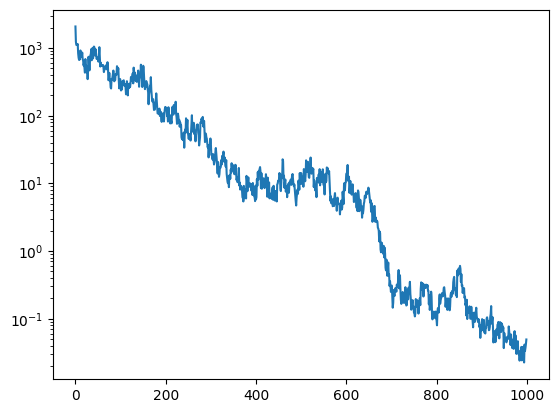

In [4]:
import matplotlib.pyplot as plt
plt.plot(MSE_hist)
plt.yscale('log')
plt.show()

## Speeding Up the Inference

A major bottleneck in the posterior sampling is the inversion of the matrix $A = X^\top X + \Lambda_\ast^{-1}$ and the sampling of multivariate normal, which is $\mathcal{O} (N^3)$ in time complexity. To speed up the computation, we can use a trick written in `FastMultivariateGauss.ipynb`.

In [5]:
def sample_efficient(
    Phi: np.ndarray,
    alpha: np.ndarray,
    Delta: np.ndarray
) -> np.ndarray:
    rng = np.random.default_rng()
    D = Phi.shape[0]
    N = Phi.shape[1]

    # Sample u from N(0, Delta)
    if np.isclose(np.diag(np.diag(Delta)), Delta).all():
        u = rng.normal(0, np.sqrt(np.diag(Delta)), N)
    else:
        u = rng.multivariate_normal(np.zeros(N), Delta)

    # Sample v from N(Phi @ u, I)
    v = rng.normal(Phi @ u, np.ones(D))

    # Solve for w
    w = np.linalg.solve(Phi @ Delta @ Phi.T + np.eye(D), alpha - v)

    return u + Delta @ Phi.T @ w

with

$$
\begin{aligned}
    \Phi &= \frac{X}{\sigma_n}, &
    \alpha &= \frac{y}{\sigma_n}, &
    \Delta &= \sigma_n^2 \Lambda_\ast.
\end{aligned}
$$

In [6]:
def sparse_BLR_efficient(x_data, y_data, num_samples, init_params, show_errors=False):
    rng = np.random.default_rng()

    D = x_data.shape[0]
    N = x_data.shape[1]

    params = init_params

    X = x_data
    Y = y_data

    MSE_hist = []
    for iter in range(num_samples):
        # sample xi
        alpha_xi = 1
        beta_xi  = 1 + 1 / params['t2']
        xi_new   = 1 / rng.gamma(alpha_xi, 1 / beta_xi)
        params['xi'] = xi_new

        # sample nu
        alpha_nu = 1
        beta_nu  = 1 + 1 / params['l2']
        nu_new   = 1 / rng.gamma(alpha_nu, 1 / beta_nu)
        params['nu'] = nu_new

        # sample l2
        alpha_l = 1
        beta_l  = 1 / params['nu'] + 1 / 2 / params['t2'] * params['w']**2 / params['sigma2_n']
        l_new   = 1 / rng.gamma(alpha_l, 1 / beta_l)
        params['l2'] = l_new

        # sample t2
        alpha_t = (N + 1) / 2
        beta_t  = 1 / params['xi'] + 1 / 2 / params['sigma2_n'] * np.sum( params['w']**2 / params['l2'] )
        t_new   = 1 / rng.gamma(alpha_t, 1 / beta_t)
        params['t2'] = t_new

        # sample sigma2_n
        L = params['t2'] * params['l2']
        SE = np.sum( ( y_data - x_data @ params['w'] )**2 )
        alpha_sigma2_n = (N + D) / 2
        beta_sigma2_n  = SE / 2 + np.sum(params['w']** 2 / L) / 2
        sigma2_n_new   = 1 / rng.gamma(alpha_sigma2_n, 1 / beta_sigma2_n)
        params['sigma2_n'] = sigma2_n_new

        # sample w
        w_new = sample_efficient(
            X / np.sqrt(params['sigma2_n']),
            Y / np.sqrt(params['sigma2_n']),
            np.diag(L) * params['sigma2_n']
        )

        params['w'] = w_new

        if show_errors:
            if (iter+1) % 100 == 0:
                print(f'Iteration {iter+1}, MSE: {SE / D}')

        MSE_hist.append(SE / D)
    return params, MSE_hist

In [7]:
N = 128
D = 64

rng = np.random.default_rng(12345)
w_true = rng.normal(0, 10, (N)) * rng.choice([0, 1], (N))
x_data = rng.choice([0, 1], (D, N))
y_data = x_data @ w_true

params = {
    'w': np.zeros(N).astype(float),
    'l2': np.ones(N).astype(float),
    't2': 1.,
    'nu': np.ones(N).astype(float),
    'xi': 1.,
    'sigma2_n': 1.,
}

num_samples = 1000

params_posterior, MSE_hist = sparse_BLR_efficient(x_data, y_data, num_samples, params, show_errors=True)

Iteration 100, MSE: 777.312010156918
Iteration 200, MSE: 350.53891023015365
Iteration 300, MSE: 322.72258735068453
Iteration 400, MSE: 175.7911809054366
Iteration 500, MSE: 106.4404682511709
Iteration 600, MSE: 22.012294061110207
Iteration 700, MSE: 1.9589998683762548
Iteration 800, MSE: 12.004331771753517
Iteration 900, MSE: 8.250106162371907
Iteration 1000, MSE: 8.457931367621052


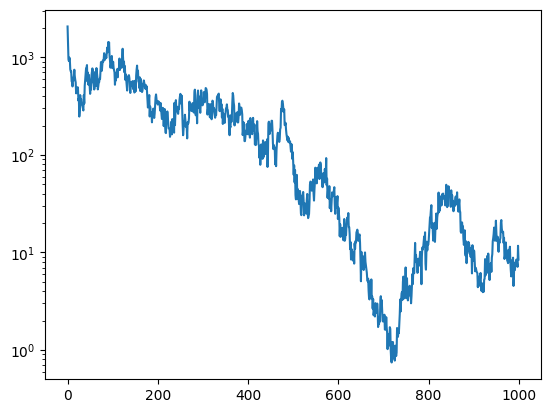

In [8]:
plt.plot(MSE_hist)
plt.yscale('log')
plt.show()

In [9]:
# Speed comparison
import time
start = time.time()
sparse_BLR(x_data, y_data, num_samples, params)
end = time.time()
time_BLR = end - start

start = time.time()
sparse_BLR_efficient(x_data, y_data, num_samples, params)
end = time.time()
time_BLR_efficient = end - start

print(f'sparse_BLR:           {time_BLR:.6f}s')
print(f'sparse_BLR_efficient: {time_BLR_efficient:.6f}s')

sparse_BLR:           9.657184s
sparse_BLR_efficient: 0.644225s


## References
- [Carvalho+ (2010)] C. M. Carvalho, N. G. Polson, and J. G. Scott, The Horseshoe Estimator for Sparse Signals, Biometrika **97**, 465 (2010).
- [Wand+ (2011)] M. P. Wand, J. T. Ormerod, S. A. Padoan, and R. Frühwirth, Mean Field Variational Bayes for Elaborate Distributions, Bayesian Analysis **6**, 847 (2011).
- [Makalic & Schmidt (2016)] E. Makalic and D. F. Schmidt, A Simple Sampler for the Horseshoe Estimator, IEEE Signal Processing Letters **23**, 179 (2016).
- [Bhattacharya+ (2016)] A. Bhattacharya, A. Chakraborty, and B. K. Mallick, Fast Sampling with Gaussian Scale Mixture Priors in High-Dimensional Regression, Biometrika **103**, 985 (2016).